In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male','female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['Age'].fillna(data['Age'].median(),inplace=True)
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [4]:
delete_columns = ['Name', 'PassengerId', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis = 1)
X_test = test.drop('Survived', axis = 1)

In [5]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,1,0,7.2500,0,2,0
1,1,1,38.0,1,0,71.2833,1,2,0
2,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,35.0,1,0,53.1000,0,2,0
4,3,0,35.0,0,0,8.0500,0,1,1


## 機械学習アルゴリズム

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', solver="sag", random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

In [8]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [9]:
y_pred[:10]

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0.])

In [10]:
y_pred = (y_pred > 0.5).astype(int)


In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0.0,3,0,22.0,1,0,7.2500,0,2,0
1,1.0,1,1,38.0,1,0,71.2833,1,2,0
2,1.0,3,1,26.0,0,0,7.9250,0,1,1
3,1.0,1,1,35.0,1,0,53.1000,0,2,0
4,0.0,3,0,35.0,0,0,8.0500,0,1,1


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


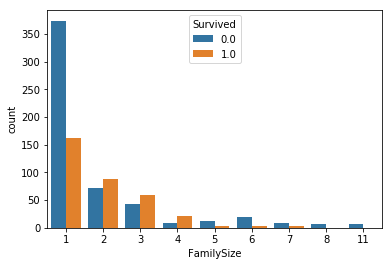

In [12]:
data['FamilySize'] = data['Parch'] + data['SibSp']+ 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]

import seaborn as sns
sns.countplot(x='FamilySize' , data = train,hue = 'Survived')

In [13]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
sub = gender_submission

In [15]:
sub['Survived'] = list(map(int,y_pred))
sub.to_csv("submission_randomforest.csv", index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.3,random_state=0,stratify=y_train)

In [17]:
categorical_features = ['Embarked','Pclass','Sex']

In [18]:
params = {
    'objective':'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

In [19]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train,y_train,categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid,reference=lgb_train,categorical_feature=categorical_features)


model = lgb.train(
    params,lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    verbose_eval=10,
    num_boost_round=1000,
    early_stopping_rounds=10
)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


In [20]:
sub['Survived'] = y_pred
sub.to_csv("submission_lightgbm.csv", index=False)

sub.head()

,PassengerId,Survived
0,892,0.036056
1,893,0.403069
2,894,0.107322
3,895,0.080240
4,896,0.460113


In [21]:
clf.fit(X_train, y_train)
y_pred_familysize_isalone = clf.predict(X_test)

sub['Survived'] = list(map(int,y_pred_familysize_isalone))
sub.to_csv("submission_familysize_isalone.csv", index = False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [22]:
clf.fit(X_train.drop('FamilySize', axis = 1), y_train)
y_pred_isalone = clf.predict(X_test.drop('FamilySize', axis = 1))

sub['Survived'] = list(map(int, y_pred_isalone))
sub.to_csv("submission_isalone.csv" , index = False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [23]:
clf.fit(X_train.drop('IsAlone', axis = 1), y_train)
y_pred_familysize = clf.predict(X_test.drop('IsAlone', axis = 1))

sub['Survived'] = list(map(int, y_pred_familysize))
sub.to_csv("submission_familysize.csv" , index = False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [24]:
clf.fit(X_train.drop(['FamilySize','IsAlone'], axis = 1), y_train)
y_pred= clf.predict(X_test.drop(['FamilySize','IsAlone'], axis = 1))

sub['Survived'] = list(map(int, y_pred))
sub.to_csv("submission.csv" , index = False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [25]:
import optuna
from sklearn.metrics import log_loss


def objective(trial):
    params = {
        'objective':'binary',
        'max_bin': trial.suggest_int('max_bin',255,500),
        'learning_rate': 0.05,
        'num_leaves': trial.suggest_int('num_leaves',32,128),
    }
    
    lgb_train = lgb.Dataset(X_train,y_train,categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_valid,y_valid,reference=lgb_train,categorical_feature=categorical_features)
    
    model = lgb.train(
    params, lgb_train,
    valid_sets=[lgb_train,lgb_eval],
    verbose_eval=10,
    num_boost_round=1000,
    early_stopping_rounds=10
    )
    
    
    y_pred_valid = model.predict(X_valid,num_iteration=model.best_iteration)
    score = log_loss(y_valid,y_pred_valid)
    return score

In [26]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective,n_trials=40)

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:39,982] Finished trial#0 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:40,247] Finished trial#1 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:40,504] Finished trial#2 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:40,769] Finished trial#3 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:41,038] Finished trial#4 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:41,320] Finished trial#5 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:41,579] Finished trial#6 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:41,837] Finished trial#7 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:42,103] Finished trial#8 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:42,361] Finished trial#9 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:42,621] Finished trial#10 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:42,881] Finished trial#11 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:43,140] Finished trial#12 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:43,408] Finished trial#13 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:43,681] Finished trial#14 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:43,960] Finished trial#15 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:44,214] Finished trial#16 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:44,471] Finished trial#17 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:44,740] Finished trial#18 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:45,013] Finished trial#19 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:45,281] Finished trial#20 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:45,533] Finished trial#21 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:45,795] Finished trial#22 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:46,048] Finished trial#23 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:46,312] Finished trial#24 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:46,579] Finished trial#25 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:46,867] Finished trial#26 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:47,124] Finished trial#27 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:47,388] Finished trial#28 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:47,647] Finished trial#29 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:47,903] Finished trial#30 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:48,161] Finished trial#31 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:48,418] Finished trial#32 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:48,680] Finished trial#33 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:48,935] Finished trial#34 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:49,195] Finished trial#35 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:49,457] Finished trial#36 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:49,712] Finished trial#37 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:49,970] Finished trial#38 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.505699	valid_1's binary_logloss: 0.532106
[20]	training's binary_logloss: 0.427825	valid_1's binary_logloss: 0.482279
[30]	training's binary_logloss: 0.377242	valid_1's binary_logloss: 0.456641
[40]	training's binary_logloss: 0.345424	valid_1's binary_logloss: 0.447083
[50]	training's binary_logloss: 0.323113	valid_1's binary_logloss: 0.440407
[60]	training's binary_logloss: 0.302727	valid_1's binary_logloss: 0.434527
[70]	training's binary_logloss: 0.285597	valid_1's binary_logloss: 0.434932
Early stopping, best iteration is:
[66]	training's binary_logloss: 0.293072	valid_1's binary_logloss: 0.433251


[I 2021-12-28 07:18:50,231] Finished trial#39 resulted in value: 0.4332512137886331. Current best value is 0.4332512137886331 with parameters: {'max_bin': 427, 'num_leaves': 79}.


In [27]:
study.best_params

{'max_bin': 427, 'num_leaves': 79}

In [28]:
from sklearn.model_selection import KFold


y_preds = []
models = []
oof_train = np.zeros((len(X_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)

categorical_features = ['Embarked', 'Pclass', 'Sex']

params = {
    'objective': 'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]

    lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train, categorical_feature=categorical_features)

    model = lgb.train(
        params, lgb_train,
        valid_sets=[lgb_train, lgb_eval],
        verbose_eval=10,
        num_boost_round=1000,
        early_stopping_rounds=10
    )

    oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    y_preds.append(y_pred)
    models.append(model)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:1143: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.899674	valid_1's binary_logloss: 0.970608
Early stopping, best iteration is:
[1]	training's binary_logloss: 0.878428	valid_1's binary_logloss: 0.907811
Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.871654	valid_1's binary_logloss: 0.91006
Early stopping, best iteration is:
[1]	training's binary_logloss: 0.856485	valid_1's binary_logloss: 0.809217
Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.925048	valid_1's binary_logloss: 0.848814
Early stopping, best iteration is:
[3]	training's binary_logloss: 0.885902	valid_1's binary_logloss: 0.826968
Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.917393	valid_1's binary_logloss: 0.925838
Early stopping, best iteration is:
[3]	training's binary_logloss: 0.88214	valid_1's binary_logloss: 0.901569
Training u

In [29]:
pd.DataFrame(oof_train).to_csv('oof_train_kfold.csv', index=False)

scores = [
    m.best_score['valid_1']['binary_logloss'] for m in models
]
score = sum(scores) / len(scores)
print('===CV scores===')
print(scores)
print(score)

===CV scores===
[0.9078106906154864, 0.8092165034676551, 0.8269683440594716, 0.9015693173622176, 0.9441181898191693]
0.8779366090648001


In [30]:
from sklearn.metrics import accuracy_score


y_pred_oof = (oof_train > 0.5).astype(int)
accuracy_score(y_train, y_pred_oof)

0.6163723916532905

In [31]:
len(y_preds)

5

In [32]:
y_preds[0][:10]

array([0.25392875, 0.29242506, 0.25544398, 0.26402014, 0.27039456,
       0.27414355, 0.29242506, 0.25544398, 0.29242506, 0.25798252])

In [33]:
y_sub = sum(y_preds) / len(y_preds)
y_sub = (y_sub > 0.5).astype(int)
y_sub[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
sub['Survived'] = y_sub
sub.to_csv("submission_lightgbm_kfold.csv", index=False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [35]:
from sklearn.model_selection import KFold


cv = KFold(n_splits=5, shuffle=True, random_state=0)
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]

    print(f'fold: {fold_id}')
    print(f'y_tr y==1 rate: {sum(y_tr)/len(y_tr)}')
    print(f'y_val y==1 rate: {sum(y_val)/len(y_val)}')

fold: 0
y_tr y==1 rate: nan
y_val y==1 rate: nan
fold: 1
y_tr y==1 rate: nan
y_val y==1 rate: nan
fold: 2
y_tr y==1 rate: nan
y_val y==1 rate: nan
fold: 3
y_tr y==1 rate: nan
y_val y==1 rate: nan
fold: 4
y_tr y==1 rate: nan
y_val y==1 rate: nan


In [36]:
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train, y_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]

    print(f'fold: {fold_id}')
    print(f'y_tr y==1 rate: {sum(y_tr)/len(y_tr)}')
    print(f'y_val y==1 rate: {sum(y_val)/len(y_val)}')

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:1143: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



fold: 0
y_tr y==1 rate: nan
y_val y==1 rate: nan
fold: 1
y_tr y==1 rate: nan
y_val y==1 rate: nan
fold: 2
y_tr y==1 rate: nan
y_val y==1 rate: nan
fold: 3
y_tr y==1 rate: nan
y_val y==1 rate: nan
fold: 4
y_tr y==1 rate: nan
y_val y==1 rate: nan


In [37]:
from sklearn.model_selection import StratifiedKFold


y_preds = []
models = []
oof_train = np.zeros((len(X_train),))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

categorical_features = ['Embarked', 'Pclass', 'Sex']

params = {
    'objective': 'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train, y_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]

    lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train, categorical_feature=categorical_features)

    model = lgb.train(
        params, lgb_train,
        valid_sets=[lgb_train, lgb_eval],
        verbose_eval=10,
        num_boost_round=1000,
        early_stopping_rounds=10
    )

    oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    y_preds.append(y_pred)
    models.append(model)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:1143: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.894727	valid_1's binary_logloss: 0.91474
Early stopping, best iteration is:
[1]	training's binary_logloss: 0.870833	valid_1's binary_logloss: 0.850969
Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.940497	valid_1's binary_logloss: 0.956558
Early stopping, best iteration is:
[3]	training's binary_logloss: 0.9039	valid_1's binary_logloss: 0.94712
Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.898222	valid_1's binary_logloss: 0.924643
Early stopping, best iteration is:
[1]	training's binary_logloss: 0.875333	valid_1's binary_logloss: 0.872057
Training until validation scores don't improve for 10 rounds.
[10]	training's binary_logloss: 0.897415	valid_1's binary_logloss: 0.913288
Early stopping, best iteration is:
[2]	training's binary_logloss: 0.86687	valid_1's binary_logloss: 0.86321
Training until

In [38]:
pd.DataFrame(oof_train).to_csv('oof_train_skfold.csv', index=False)
print(oof_train[:10])

scores = [
    m.best_score['valid_1']['binary_logloss'] for m in models
]
score = sum(scores) / len(scores)
print('===CV scores===')
print(scores)
print(score)

[0.25050837 0.31654146 0.28533444 0.34710122 0.27879352 0.26409888
 0.26537665 0.27456844 0.26537665 0.21061855]
===CV scores===
[0.8509694867938913, 0.9471195587474271, 0.8720567808765946, 0.8632095561915339, 0.8688509396905946]
0.8804412644600083


In [39]:
from sklearn.metrics import accuracy_score


y_pred_oof = (oof_train > 0.5).astype(int)
accuracy_score(y_train, y_pred_oof)

0.6163723916532905

In [40]:
y_sub = sum(y_preds) / len(y_preds)
y_sub = (y_sub > 0.5).astype(int)
y_sub[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 提出

In [41]:
sub = pd.DataFrame(pd.read_csv('../input/titanic/test.csv')['PassengerId'])
sub['Survived'] = list(map(int, y_pred))
sub.to_csv("submission.csv", index=False)